<font size = 5><b>Prosper Loan Data Analysis</b></font><br><br>
<font size = 4><b>By Brett Gardner</b></font><br><br>
<font size = 4><b>Setup</b></font></b><br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head(2)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0         0.158        0.138  ...         -133.18                0.0   
1         0.092        0.082  ...            0.00                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  

[2 rows x 81 columns]

In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
loan_df.shape

(113937, 81)

In [5]:
loan_df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [6]:
loan_df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

In [7]:
loan_df.corr()

ListingNumber      Term  BorrowerAPR  \
ListingNumber                     1.000000  0.319971    -0.031520   
Term                              0.319971  1.000000    -0.011183   
BorrowerAPR                      -0.031520 -0.011183     1.000000   
BorrowerRate                     -0.114391  0.020085     0.989824   
LenderYield                      -0.113544  0.020556     0.989329   
...                                    ...       ...          ...   
PercentFunded                     0.014688 -0.028806    -0.028236   
Recommendations                  -0.126031 -0.056680    -0.044236   
InvestmentFromFriendsCount       -0.092813 -0.043507    -0.046757   
InvestmentFromFriendsAmount      -0.053481 -0.024472    -0.031841   
Investors                        -0.279659 -0.045137    -0.307606   

                             BorrowerRate  LenderYield  \
ListingNumber                   -0.114391    -0.113544   
Term                             0.020085     0.020556   
BorrowerAPR                      0.989824     0.989329   
BorrowerRate                     1.000000     0.999211   
LenderYield                      0.999211     1.000000   
...                                   ...          ...   
PercentFunded                   -0.029025    -0.029209   
Recommendations                 -0.030579    -0.031069   
InvestmentFromFriendsCount      -0.037312    -0.037302   
InvestmentFromFriendsAmount     -0.026512    -0.026632   
Investors                       -0.274217    -0.274174   

                             EstimatedEffectiveYield  EstimatedLoss  \
ListingNumber                              -0.217721      -0.239568   
Term                                        0.057047      -0.107140   
BorrowerAPR                                 0.895635       0.949538   
BorrowerRate                                0.895282       0.945297   
LenderYield                                 0.895343       0.945308   
...                                              ...            ...   
PercentFunded                              -0.043366      -0.022738   
Recommendations                            -0.046694       0.004081   
InvestmentFromFriendsCount                 -0.063848       0.009475   
InvestmentFromFriendsAmount                -0.038146       0.024555   
Investors                                  -0.265244      -0.275501   

                             EstimatedReturn  ProsperRating (numeric)  \
ListingNumber                      -0.461391                 0.209200   
Term                                0.152505                 0.079179   
BorrowerAPR                         0.794275                -0.962151   
BorrowerRate                        0.817670                -0.953105   
LenderYield                         0.817654                -0.953119   
...                                      ...                      ...   
PercentFunded                      -0.039422                 0.012491   
Recommendations                    -0.019886                 0.004772   
InvestmentFromFriendsCount         -0.043022                 0.007746   
InvestmentFromFriendsAmount        -0.031902                -0.010459   
Investors                          -0.092337                 0.307753   

                             ProsperScore  ...  LP_ServiceFees  \
ListingNumber                   -0.106235  ...        0.208286   
Term                             0.028947  ...       -0.167600   
BorrowerAPR                     -0.668287  ...        0.116974   
BorrowerRate                    -0.649736  ...        0.095993   
LenderYield                     -0.649783  ...        0.097854   
...                                   ...  ...             ...   
PercentFunded                   -0.019344  ...        0.069591   
Recommendations                  0.026658  ...       -0.039016   
InvestmentFromFriendsCount       0.028343  ...       -0.035004   
InvestmentFromFriendsAmount      0.003131  ...       -0.056675   
Investors                        0.320594  ... 

<font size = 4><b>Data Cleaning Process</b></font>

<b>Define: We want to make a column for the average Credit Score.</b>

In [8]:
#create column witht he average credit score
loan_df['avg_credit_score'] = loan_df.apply(lambda row: ((row.CreditScoreRangeLower)  + 
                                  (row.CreditScoreRangeUpper)/2), axis = 1) 

<b>Test</b>

In [9]:
loan_df['avg_credit_score']

0          969.5
1         1029.5
2          729.5
3         1209.5
4         1029.5
           ...  
113932    1059.5
113933    1059.5
113934    1059.5
113935    1029.5
113936    1029.5
Name: avg_credit_score, Length: 113937, dtype: float64

<b>Define: We want to change the Loan Status to a Category.</b>

In [10]:
loan_df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [11]:
for col in ['LoanStatus']:
    loan_df[col] = loan_df[col].astype('category')

<b>Test</b>

In [12]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 82 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null category
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha

<font size = 5><b>What is the structure of the data set?</b></font><br>

113,937 rows with 81 columns. 

<font size = 5><b>Univariate Exploration</b></font>

I'll start looking at a few variables in a standalone plot: Loan Status, Borrower APR, Debt To Income Ratio, Loan Original Amount, ProsperScore, Average Credit Score, Occupations, Delinquencies the Last 7 Years, and Available Bankcard Credit.

We want to see what variables lead to a higher APR. I think the above variables that I am choosing to analyze might be helpful in determining what characteristics lead to defaults. 

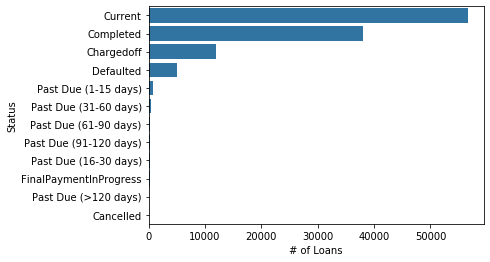

In [13]:
# Plot LoanStatus
default_color = sb.color_palette()[0]

# Order the categorical variable type
cat_order = loan_df['LoanStatus'].value_counts().index

sb.countplot(data = loan_df, y = 'LoanStatus', color = default_color, order=cat_order)
plt.xlabel('# of Loans')
plt.ylabel('Status');

In [14]:
# Check the percentage of loans in each status
pct_loans_by_status = pd.DataFrame(loan_df.groupby('LoanStatus')['LoanStatus'].count())
pct_loans_by_status['PctLoans'] = (pct_loans_by_status['LoanStatus']/pct_loans_by_status['LoanStatus'].sum())*100
pct_loans_by_status.sort_values(by='PctLoans', ascending=False)

LoanStatus   PctLoans
LoanStatus                                   
Current                      56576  49.655511
Completed                    38074  33.416713
Chargedoff                   11992  10.525115
Defaulted                     5018   4.404188
Past Due (1-15 days)           806   0.707408
Past Due (31-60 days)          363   0.318597
Past Due (61-90 days)          313   0.274713
Past Due (91-120 days)         304   0.266814
Past Due (16-30 days)          265   0.232585
FinalPaymentInProgress         205   0.179924
Past Due (>120 days)            16   0.014043
Cancelled                        5   0.004388

In [15]:
# Group all Past Due loans under an unique status
loan_df['LoanStatus'] = loan_df['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

# Convert LoanStatus to a categorical variable
loan_status_dict = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']

ordered_loan_status = pd.api.types.CategoricalDtype(ordered = True, categories = loan_status_dict)

loan_df['LoanStatus'] = loan_df['LoanStatus'].astype(ordered_loan_status)

In [16]:
# Check the percentage of loans in each status
pct_loans_by_status = pd.DataFrame(loan_df.groupby('LoanStatus')['LoanStatus'].count())
pct_loans_by_status['PctLoans'] = (pct_loans_by_status['LoanStatus']/pct_loans_by_status['LoanStatus'].sum())*100
pct_loans_by_status.sort_values(by='PctLoans', ascending=False)

LoanStatus   PctLoans
LoanStatus                                   
Current                      56576  49.657691
Completed                    38074  33.418179
Chargedoff                   11992  10.525577
Defaulted                     5018   4.404382
Past Due                      2067   1.814240
FinalPaymentInProgress         205   0.179932

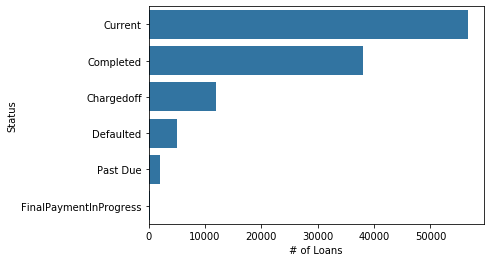

In [17]:
# Plot LoanStatus
default_color = sb.color_palette()[0]

# Order the categorical variable type
cat_order = loan_df['LoanStatus'].value_counts().index

sb.countplot(data = loan_df, y = 'LoanStatus', color = default_color, order=cat_order)
plt.xlabel('# of Loans')
plt.ylabel('Status');

About half of the loans are current. About a third are completed. Another 10.53% were charged-off, and 4.40% defaulted. Only 1.81% were past due and a miniscule percentage (0.18%) had their final payment in progress. We care most about the defaulted and charged off loans, which are about 15% of the total loans.

In [18]:
loan_df.BorrowerAPR.value_counts()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
           ... 
0.22825       1
0.22955       1
0.24844       1
0.30775       1
0.11833       1
Name: BorrowerAPR, Length: 6677, dtype: int64

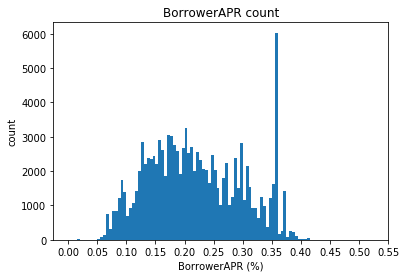

In [19]:
# start with a standard-scaled plot
bins = np.arange(0, loan_df['BorrowerAPR'].max(), 0.005)
plt.hist(data = loan_df, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, loan_df['BorrowerAPR'].max()+0.05, 0.05));

BorrowerAPR looks to be an almost normal distribution outside of the huge count around 35%. 

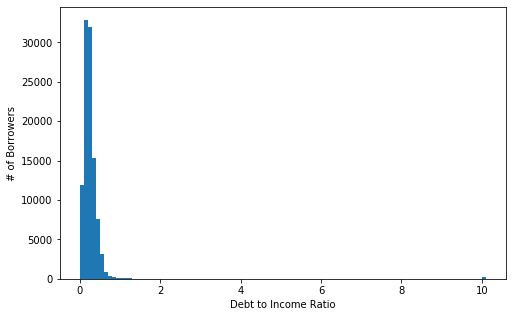

In [20]:
#plt DebtToIncome Ratio
binsize = 0.1
bins = np.arange(0, loan_df['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('# of Borrowers');

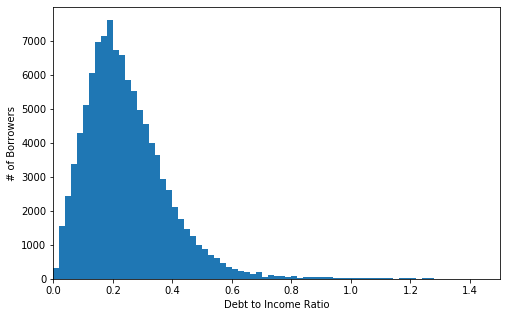

In [21]:
# Plot a standard-scaled plot for DebtToIncomeRatio
binsize = 0.02
bins = np.arange(0, loan_df['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_df[loan_df['DebtToIncomeRatio'].notnull()], x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('# of Borrowers')
plt.xlim(0,1.5);

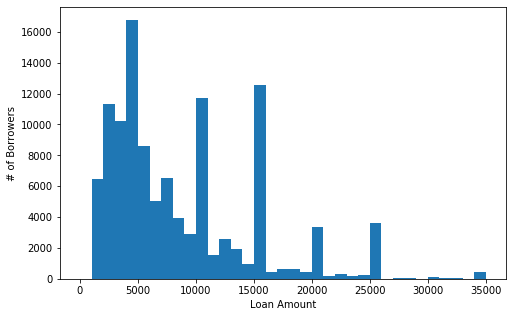

In [22]:
binsize = 1000
bins = np.arange(0, loan_df['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount')
plt.ylabel('# of Borrowers');

In [23]:
loan_df.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

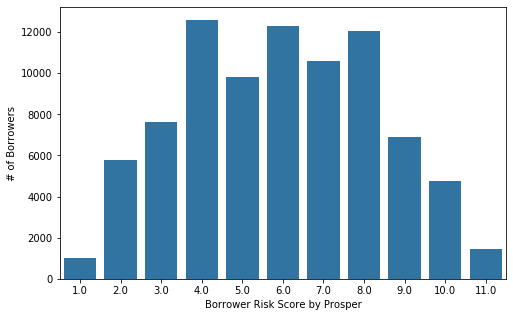

In [24]:
#prosperscore plot
binsize = 1
bins = np.arange(0, loan_df['ProsperScore'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
sb.countplot(data = loan_df, x = 'ProsperScore', color = default_color)
plt.xlabel('Borrower Risk Score by Prosper')
plt.ylabel('# of Borrowers');

The ProsperScore plot almost looks like a normal distribution. 

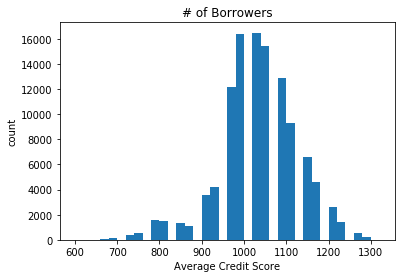

In [25]:
bins = np.arange(600, loan_df['avg_credit_score'].max(), 20)
plt.hist(data = loan_df, x = 'avg_credit_score', bins = bins)
plt.xticks(np.arange(600, 1400, 100))
plt.title('# of Borrowers')
plt.xlabel('Average Credit Score')
plt.ylabel('count');

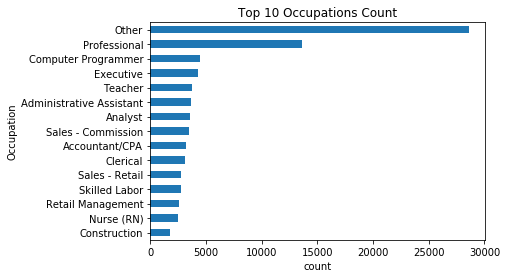

In [26]:
# see the top 15 occupations of borrowers
loan_df['Occupation'].value_counts()[14::-1].plot(kind='barh')
plt.title('Top 10 Occupations Count')
plt.xlabel('count')
plt.ylabel('Occupation')
plt.fontsize = 12
plt.figsize=(12,12)

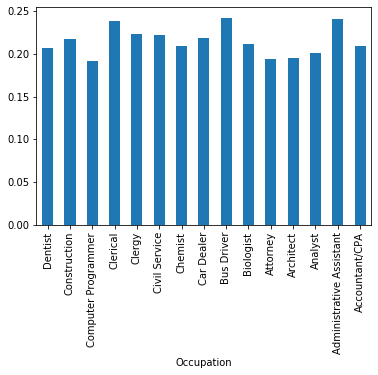

In [27]:
# bar plot for APR means for each top 10 occupations.

Occupation = loan_df.groupby('Occupation').BorrowerAPR.mean()[14::-1]
Occupation.plot(kind = 'bar')

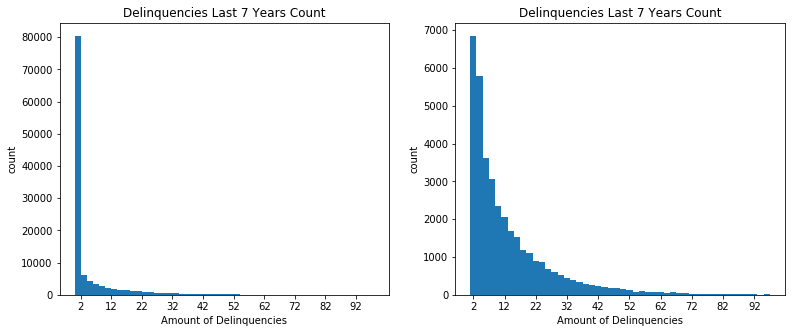

In [28]:
# Histogram for deliquency records count from the last 7 Years 
plt.figure(figsize = [13, 5]) 
plt.subplot(1, 2, 1)
bins = np.arange(0, loan_df['DelinquenciesLast7Years'].max(), 2)
plt.hist(data = loan_df, x = 'DelinquenciesLast7Years', bins = bins)
plt.xticks(np.arange(2, 100+1, 10))
plt.title('Delinquencies Last 7 Years Count')
plt.xlabel('Amount of Delinquencies')
plt.ylabel('count');

plt.subplot(1, 2, 2)
bins = np.arange(1, loan_df['DelinquenciesLast7Years'].max(), 2)
plt.hist(data = loan_df, x = 'DelinquenciesLast7Years', bins = bins)
plt.xticks(np.arange(2, 100+1, 10))
plt.title('Delinquencies Last 7 Years Count')
plt.xlabel('Amount of Delinquencies')
plt.ylabel('count');

In [29]:
#highcreditavailability
highcreditavail = loan_df[loan_df['AvailableBankcardCredit'] > 100000]
highcreditavail.AvailableBankcardCredit.sort_values(ascending = False)

24916     646285.0
93897     572427.0
105754    566480.0
80178     498374.0
39804     477656.0
            ...   
789       100131.0
92655     100120.0
7899      100018.0
89562     100016.0
84132     100010.0
Name: AvailableBankcardCredit, Length: 750, dtype: float64

In [30]:
len(highcreditavail['AvailableBankcardCredit'])

750

In [31]:
percent = (len(highcreditavail['AvailableBankcardCredit']) / len(loan_df['ListingKey']))
percent

0.006582585112825509

The vast majority of borrowers were classified as "Professional" or "Other". This means that we probably won't have enough information to really use this to determine what types of occupations are better borrowers as they are far too broad for in-depth analysis. 

Might classification of "High Credit Availability" led to too few borrowers in the sample. Only 0.6% of borrowers had more than $100,000 of availability. We are going to want to ignore that variable. 

We also see that Prosper is making small loans, mostly under $15,000. 

The vast majority of borrowers have Debt to Income of less than 40%. 

<font size = 5><b>Bivariate Exploration</b></font>

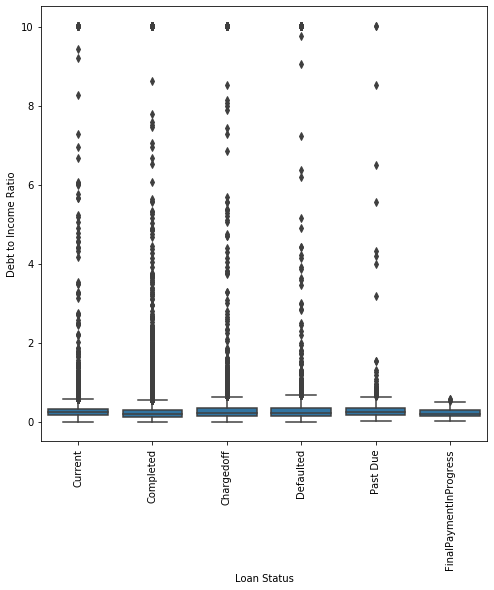

In [32]:
# Define figure size
plt.figure(figsize = [8, 8])

# LoanStatus vs DebtToIncomeRatio
default_color = sb.color_palette()[0]
ax1 = sb.boxplot(data=loan_df, x='LoanStatus', y='DebtToIncomeRatio', color = default_color, order=cat_order)
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income Ratio')
plt.xticks(rotation=90);

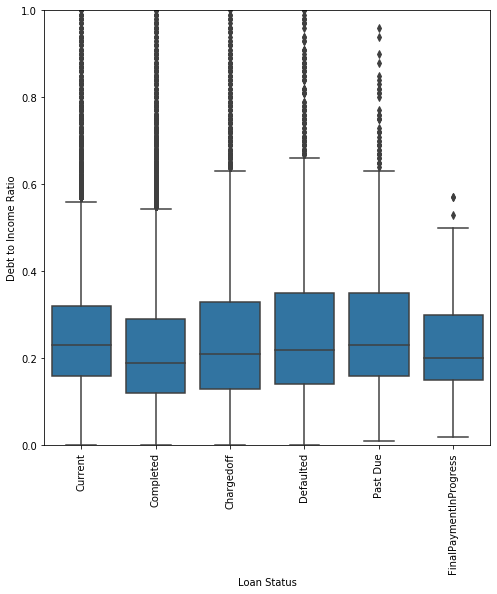

In [33]:
# LoanStatus vs DebtToIncomeRatio limiting y axes
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[0]

ax1 = sb.boxplot(data=loan_df, x='LoanStatus', y='DebtToIncomeRatio', color = default_color, order=cat_order)
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income Ratio')
plt.ylim(0,1)
plt.xticks(rotation=90);

Charged-off and defaulted loans have borrowers with higher Debt to Income Ratios, which makes sense. You are more likely to default if you have more debt realtive to your income as it is harder to pay off the debt.

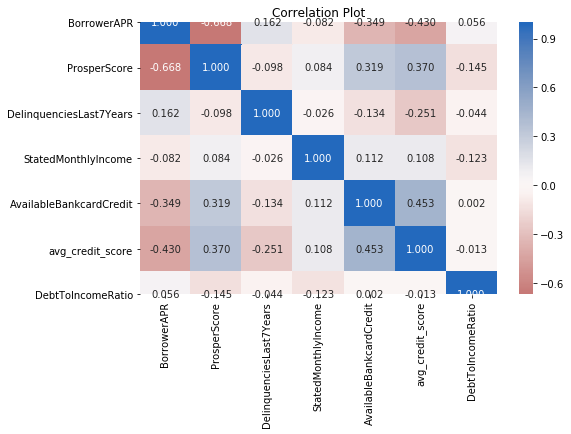

In [34]:
# correlation plot 
selected_variables = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years',
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'avg_credit_score', 'DebtToIncomeRatio']

plt.figure(figsize = [8, 5])
sb.heatmap(loan_df[selected_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

There wasn't much correlation between any of the pairs. There was a negative correlation of .668 between ProsperScore and BorrowerAPR, which is a logical outcome. You would charge more interest to the borrowers with lower ratings. 

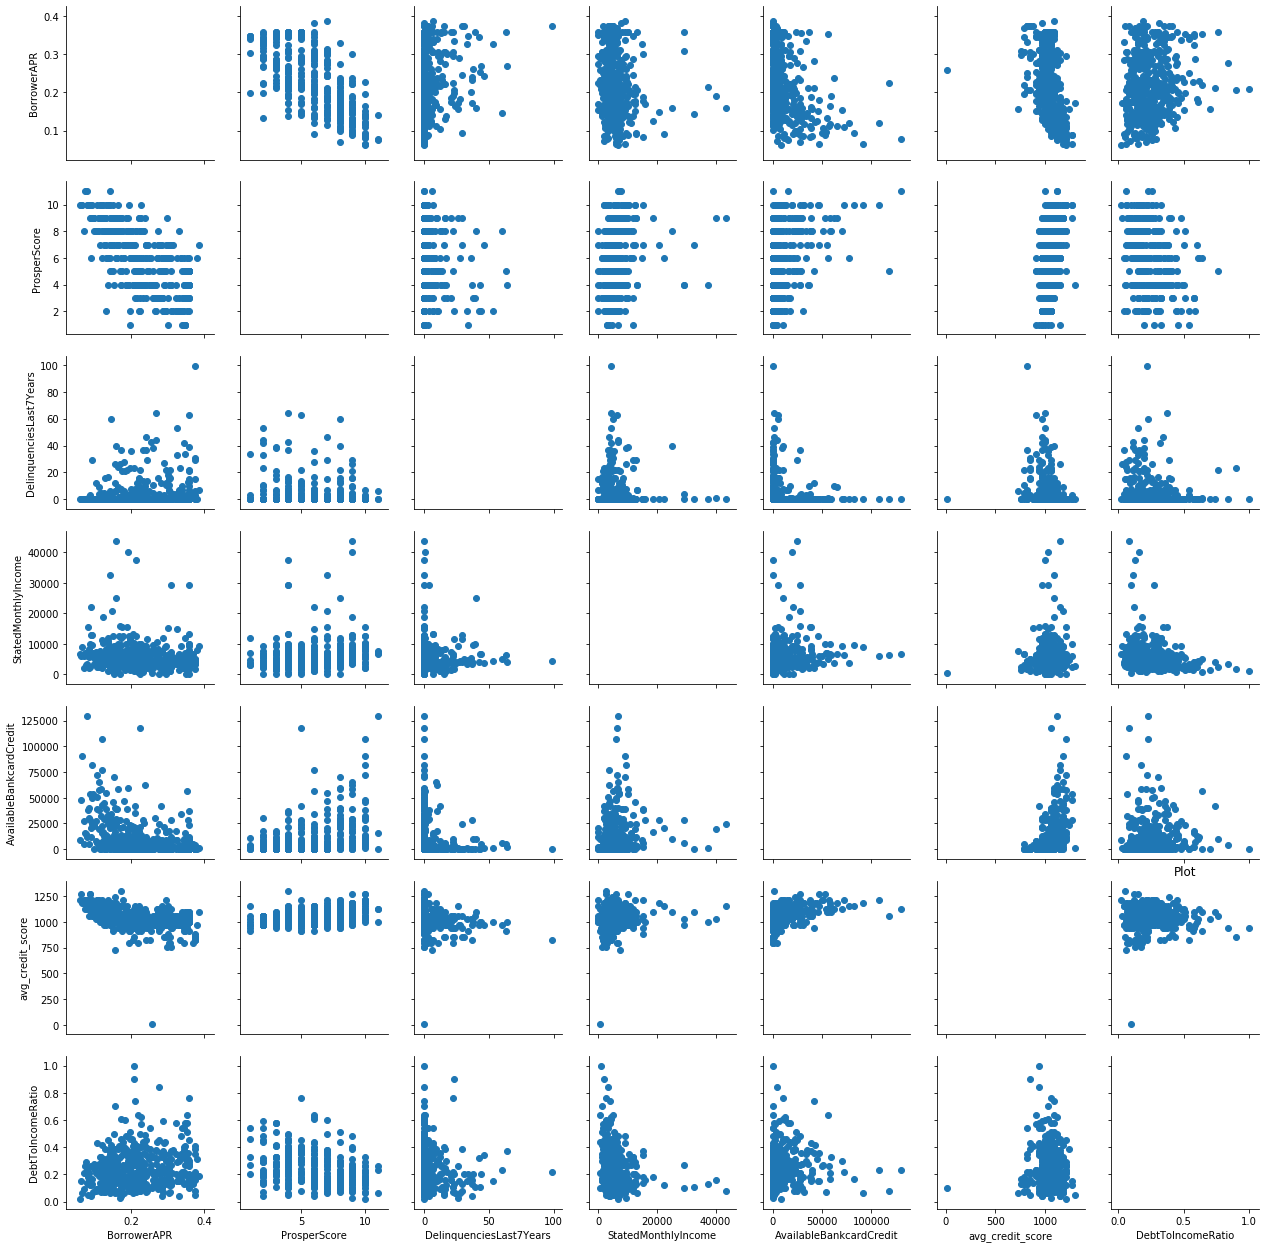

In [35]:
#500 loan sample
samples = np.random.choice(loan_df.shape[0], 500, replace = False)
loan_samp = loan_df.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = selected_variables)
g.map_offdiag(plt.scatter)
plt.title('Plot');

In [36]:
loan_df.avg_credit_score.value_counts()

1029.5    16492
999.5     16366
1059.5    15471
1089.5    12923
969.5     12199
1119.5     9267
1149.5     6606
1179.5     4624
939.5      4172
909.5      3602
1209.5     2644
789.5      1593
819.5      1474
1239.5     1409
849.5      1357
879.5      1125
1269.5      567
759.5       554
729.5       346
1299.5      212
699.5       141
9.5         133
669.5        36
1329.5       27
639.5         5
549.5         1
Name: avg_credit_score, dtype: int64

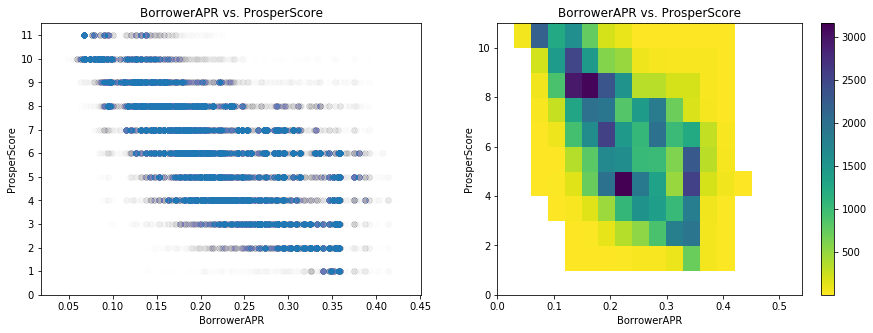

In [37]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = loan_df, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, loan_df['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, loan_df['ProsperScore'].max()+1, 1)
plt.hist2d(data = loan_df, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

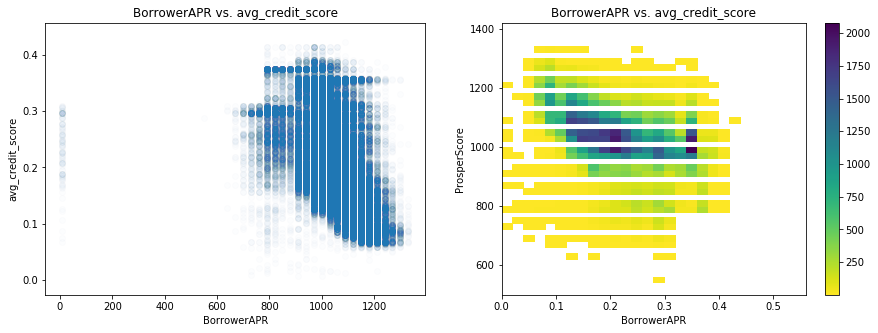

In [38]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = loan_df, x = 'avg_credit_score', y = 'BorrowerAPR', alpha = 0.01)
plt.title('BorrowerAPR vs. avg_credit_score')
plt.xlabel('BorrowerAPR')
plt.ylabel('avg_credit_score');


plt.subplot(1, 2, 2)
bins_x = np.arange(0, loan_df['BorrowerAPR'].max()+0.05, 0.02)
bins_y = np.arange(500, loan_df['avg_credit_score'].max()+100, 20)
plt.hist2d(data = loan_df, x = 'BorrowerAPR', y = 'avg_credit_score', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. avg_credit_score')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

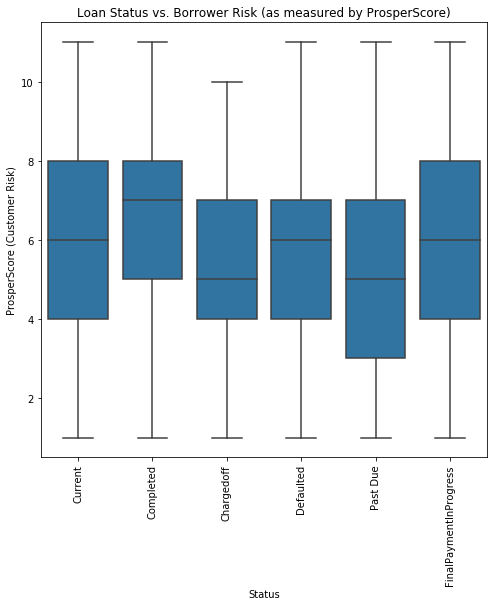

In [39]:
# LoanStatus vs ProsperScore
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[0]

ax2 = sb.boxplot(data=loan_df, x='LoanStatus', y='ProsperScore', color = default_color, order=cat_order)
plt.title('Loan Status vs. Borrower Risk (as measured by ProsperScore)')
plt.xlabel('Status')
plt.ylabel('ProsperScore (Customer Risk)')
plt.xticks(rotation=90)
plt.show()

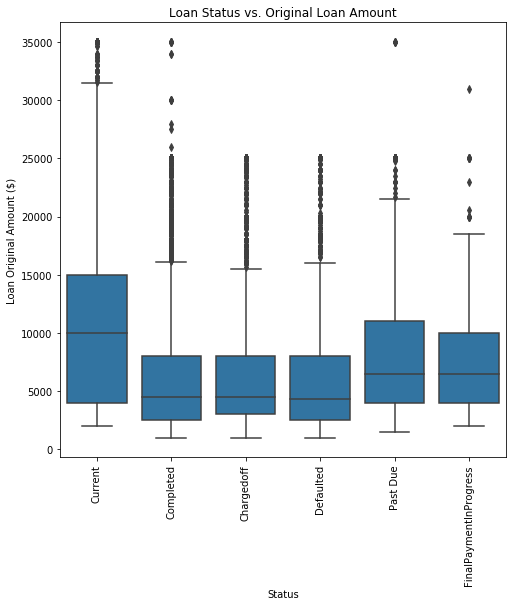

In [40]:
# LoanStatus vs LoanOriginalAmount
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[0]

ax2 = sb.boxplot(data=loan_df, x='LoanStatus', y='LoanOriginalAmount', color = default_color, order=cat_order)
plt.title('Loan Status vs. Original Loan Amount')
plt.xlabel('Status')
plt.ylabel('Loan Original Amount ($)')
plt.xticks(rotation=90)
plt.show()

Our bivariate analysis showed a few things: More poorly rated borrowers, as measured by the ProsperScore, have higher APR's. That makes sense - riskier borrowers should command higher interest rates as they are higher risk. Average Credit Score showed a comparable correlation - lower credit scores, had a higher APR. I was very surprised at the .37 correlation between ProsperScore and Average Credit Score. I thought the relationship would be much stronger. It shows there is much more that goes into the analysis of deriving a ProsperScore than just Credit Score.  

I also created a couple of plots to see what led to specific Loan Statuses. It looked like Prosper Score 

<font size = 5><b>Multivariate Exploration</b></font>

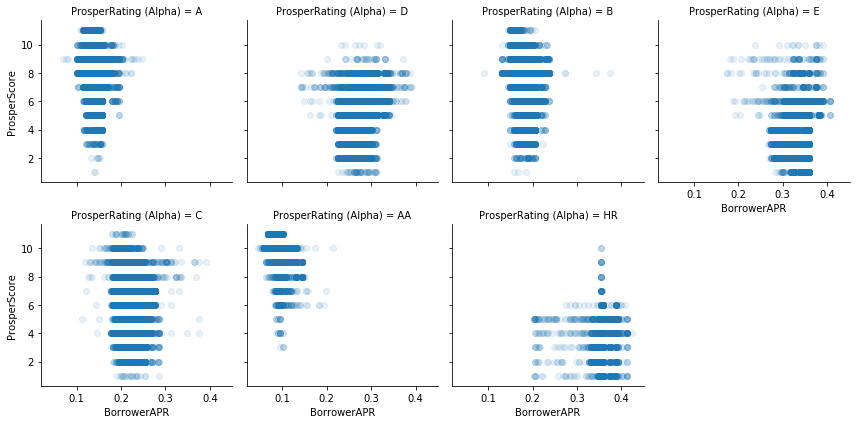

In [41]:
g = sb.FacetGrid(data = loan_df, col = 'ProsperRating (Alpha)', col_wrap = 4, height = 3)
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore')
plt.show()

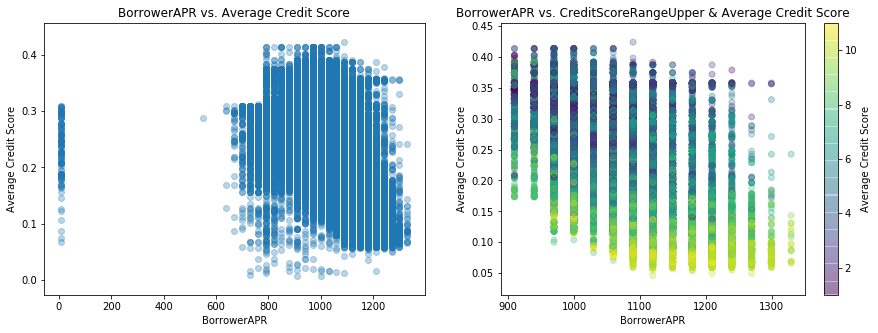

In [42]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = loan_df, x = 'avg_credit_score', y = 'BorrowerAPR', alpha = 0.3)
plt.title('BorrowerAPR vs. Average Credit Score')
plt.xlabel('BorrowerAPR')
plt.ylabel('Average Credit Score');


plt.subplot(1, 2, 2)
plt.scatter(data = loan_df, x = 'avg_credit_score', y = 'BorrowerAPR', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'Average Credit Score')
plt.title('BorrowerAPR vs. CreditScoreRangeUpper & Average Credit Score')
plt.xlabel('BorrowerAPR')
plt.ylabel('Average Credit Score');

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Exploration_LoanProsperAnalysis.ipynb'])

0